# Multiclass Classification of Newswires

Build a network to classify Reuters newswires into ***46*** mutually exclusive topics

In [1]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000) 

#To select the top 10000 occuring words

Using TensorFlow backend.


2113536/2110848 [==============================] - 2s 1us/step


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


The data is a list of integers (word indices)

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Decoding newswires back to text

In [15]:
word_index= reuters.get_word_index()
reverse_word_index= dict([(values, key) for (key, values) in word_index.items()])
decoded_newswire= ' '.join([reverse_word_index.get(i) for i in train_data[0]])

In [16]:
decoded_newswire

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [28]:
print(list(reverse_word_index.keys())[0])
print(list(reverse_word_index.values())[0])

10996
mdbl


In [32]:
train_label[10]

3

### Preparing Data

#### Encoding data

```One-hot encoding``` is a widely used format for categorical data, also called ```categorical encoding```

In [34]:
import numpy as np

def vector_sequences(sequences, dimensions=10000):
    results= np.zeros((len(sequences), dimensions))
    for i, label in enumerate(sequences):
        results[i,label]=1
    
    return results

In [35]:
x_train= vector_sequences(train_data)
x_test= vector_sequences(test_data)

To vectorize labels, we can use similar to the above function or use a built-in function by keras

In [38]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels= to_categorical(train_label)
one_hot_test_labels= to_categorical(test_label)

### Building Network

#### Model Definition

We will use larger units in hidden layers instead of using smaller ones, just to prevent **Information Bottlenecks**, where the information is permanently dropped at a layer and it can never be recovered in the next layers

The last layer uses a ```softmax``` activation. It means the network will output a probability distribution over the **46** different output classes—for every input sample, the network will produce a 46-dimensional output vector, where ```output[i]``` is the probability that the sample belongs to class ```i```. ***The 46 scores will sum to 1.***

In [41]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use in this case is ```categorical_crossentropy```. **It measures the distance between two probability distributions**: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, the network is trained to output something as close as possible to the true labels.

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Validation Set

In [43]:
x_val= x_train[:1000]
partial_x_train= x_train[1000:]

y_val= one_hot_train_labels[:1000]
partial_y_train= one_hot_train_labels[1000:]

#### Train the Model

In [44]:
history= model.fit(partial_x_train, partial_y_train, epochs=100, batch_size=1024, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/100
7982/7982 [==============================] - 9s 1ms/step - loss: 3.0346 - acc: 0.4628 - val_loss: 2.2278 - val_acc: 0.6020
Epoch 2/100
7982/7982 [==============================] - 1s 80us/step - loss: 1.8562 - acc: 0.6525 - val_loss: 1.6473 - val_acc: 0.6660
Epoch 3/100
7982/7982 [==============================] - 1s 80us/step - loss: 1.3920 - acc: 0.7271 - val_loss: 1.3931 - val_acc: 0.7080
Epoch 4/100
7982/7982 [==============================] - 1s 80us/step - loss: 1.1260 - acc: 0.7677 - val_loss: 1.2291 - val_acc: 0.7430
Epoch 5/100
7982/7982 [==============================] - 1s 80us/step - loss: 0.9384 - acc: 0.8069 - val_loss: 1.1340 - val_acc: 0.7620
Epoch 6/100
7982/7982 [==============================] - 1s 83us/step - loss: 0.8026 - acc: 0.8330 - val_loss: 1.0621 - val_acc: 0.7740
Epoch 7/100
7982/7982 [==============================] - 1s 85us/step - loss: 0.6791 - acc: 0.8616 - val_loss: 1.0228 - val_acc: 0.7820
E

7982/7982 [==============================] - 1s 81us/step - loss: 0.0796 - acc: 0.9593 - val_loss: 1.2666 - val_acc: 0.7850
Epoch 61/100
7982/7982 [==============================] - 1s 80us/step - loss: 0.0779 - acc: 0.9585 - val_loss: 1.2969 - val_acc: 0.7890
Epoch 62/100
7982/7982 [==============================] - 1s 83us/step - loss: 0.0753 - acc: 0.9612 - val_loss: 1.3716 - val_acc: 0.7790
Epoch 63/100
7982/7982 [==============================] - 1s 82us/step - loss: 0.0770 - acc: 0.9592 - val_loss: 1.3033 - val_acc: 0.7860
Epoch 64/100
7982/7982 [==============================] - 1s 80us/step - loss: 0.0804 - acc: 0.9570 - val_loss: 1.3340 - val_acc: 0.7840
Epoch 65/100
7982/7982 [==============================] - 1s 80us/step - loss: 0.0751 - acc: 0.9599 - val_loss: 1.2913 - val_acc: 0.7810
Epoch 66/100
7982/7982 [==============================] - 1s 82us/step - loss: 0.0773 - acc: 0.9594 - val_loss: 1.2995 - val_acc: 0.7810
Epoch 67/100
7982/7982 [==============================

#### Plot Train and Validation Loss

In [48]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

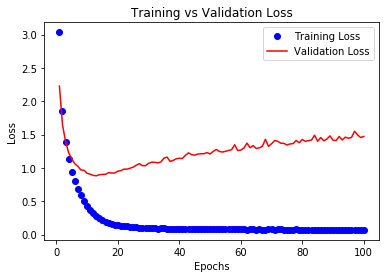

In [52]:
import matplotlib.pyplot as plt

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label= "Training Loss")
plt.plot(epochs, val_loss, 'b', label= "Validation Loss", color='red')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plot Train vs Validation Accuracy

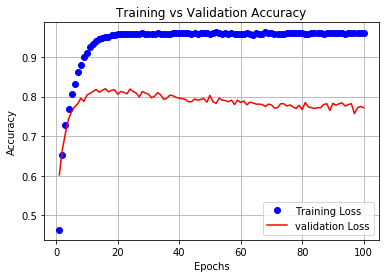

In [57]:
acc= history.history['acc']
val_acc= history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='validation Loss', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

#### Retraining Model from Scratch 

In [71]:
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=1024, validation_data=(x_val, y_val))

results= model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 129us/step - loss: 2.9629 - acc: 0.4453 - val_loss: 2.1130 - val_acc: 0.5850
Epoch 2/15
7982/7982 [==============================] - 1s 81us/step - loss: 1.7858 - acc: 0.6457 - val_loss: 1.5869 - val_acc: 0.6520
Epoch 3/15
7982/7982 [==============================] - 1s 79us/step - loss: 1.3530 - acc: 0.7144 - val_loss: 1.3565 - val_acc: 0.7080
Epoch 4/15
7982/7982 [==============================] - 1s 79us/step - loss: 1.1014 - acc: 0.7669 - val_loss: 1.2243 - val_acc: 0.7350
Epoch 5/15
7982/7982 [==============================] - 1s 79us/step - loss: 0.9266 - acc: 0.7993 - val_loss: 1.1411 - val_acc: 0.7440
Epoch 6/15
7982/7982 [==============================] - 1s 79us/step - loss: 0.7957 - acc: 0.8260 - val_loss: 1.0869 - val_acc: 0.7530
Epoch 7/15
7982/7982 [==============================] - 1s 79us/step - loss: 0.6830 - acc: 0.8515 - val_loss: 1.0246 - val_acc: 0.7710
Epoch 

[1.007784054731537, 0.7858414960194143]

**Loss:** 1.0078

**Accuracy:** 78.58%

In [75]:
test_labels_copy= test_label.copy()
np.random.shuffle(test_labels_copy)
hits= np.array(test_labels_copy)==np.array(test_label)
float(np.sum(hits)/len(test_label))

0.19456812110418523

In [76]:
predictions= model.predict(x_test)

Each entry in predictions is a vector of length 46

In [80]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1

In [81]:
np.sum(predictions[0])

1.0

The largest entry is the predicted class—the class with the highest probability:

In [109]:
np.argmax(predictions[0])

3

### Cast labels as integer tensor

In [112]:
y_train= np.array(train_label)
y_test= np.array(test_label)

In [114]:
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=15, batch_size=1024)

results= model.evaluate(x_test, y_test)
results

Epoch 1/15
8982/8982 [==============================] - 1s 149us/step - loss: 3.1475 - acc: 0.4727
Epoch 2/15
8982/8982 [==============================] - 1s 71us/step - loss: 1.8609 - acc: 0.6640
Epoch 3/15
8982/8982 [==============================] - 1s 72us/step - loss: 1.3369 - acc: 0.7239
Epoch 4/15
8982/8982 [==============================] - 1s 71us/step - loss: 1.0802 - acc: 0.7688
Epoch 5/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.9007 - acc: 0.8093
Epoch 6/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.7656 - acc: 0.8379
Epoch 7/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.6607 - acc: 0.8612
Epoch 8/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.5569 - acc: 0.8860
Epoch 9/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.4813 - acc: 0.9004
Epoch 10/15
8982/8982 [==============================] - 1s 71us/step - loss: 0.4172 - acc: 0.9135
Epoch 11/15
8982/8

[1.019971413794948, 0.7764915405430118]

### Model with Information Bottleneck
Because the final outputs are 46-dimensional, we should avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when we introduce an ```information bottleneck``` by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional

In [116]:
model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=1024, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 2s 190us/step - loss: 3.6265 - acc: 0.0629 - val_loss: 3.4399 - val_acc: 0.1360
Epoch 2/15
7982/7982 [==============================] - 1s 84us/step - loss: 3.3038 - acc: 0.2378 - val_loss: 3.1886 - val_acc: 0.2690
Epoch 3/15
7982/7982 [==============================] - 1s 84us/step - loss: 3.0542 - acc: 0.2836 - val_loss: 2.9824 - val_acc: 0.2750
Epoch 4/15
7982/7982 [==============================] - 1s 83us/step - loss: 2.8444 - acc: 0.2880 - val_loss: 2.8210 - val_acc: 0.2810
Epoch 5/15
7982/7982 [==============================] - 1s 83us/step - loss: 2.6707 - acc: 0.2953 - val_loss: 2.6784 - val_acc: 0.2860
Epoch 6/15
7982/7982 [==============================] - 1s 81us/step - loss: 2.5207 - acc: 0.3106 - val_loss: 2.5594 - val_acc: 0.3010
Epoch 7/15
7982/7982 [==============================] - 1s 84us/step - loss: 2.3923 - acc: 0.3259 - val_loss: 2.4477 - val_acc: 0.3210
Epoch 

Now **Validation Accuracy** is ***65.5%***. There is ***~19.6%*** of dip in validation accuracy

### Experiment: Increase the number of layer and hidden units

In [121]:
model= models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=1024, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/15
7982/7982 [==============================] - 1s 160us/step - loss: 2.8714 - acc: 0.4506 - val_loss: 2.0148 - val_acc: 0.5330
Epoch 2/15
7982/7982 [==============================] - 1s 84us/step - loss: 1.6203 - acc: 0.6426 - val_loss: 1.4954 - val_acc: 0.6530
Epoch 3/15
7982/7982 [==============================] - 1s 83us/step - loss: 1.2588 - acc: 0.7116 - val_loss: 1.2721 - val_acc: 0.7100
Epoch 4/15
7982/7982 [==============================] - 1s 83us/step - loss: 1.0306 - acc: 0.7601 - val_loss: 1.2365 - val_acc: 0.7310
Epoch 5/15
7982/7982 [==============================] - 1s 83us/step - loss: 0.8308 - acc: 0.8140 - val_loss: 1.0840 - val_acc: 0.7600
Epoch 6/15
7982/7982 [==============================] - 1s 82us/step - loss: 0.6529 - acc: 0.8558 - val_loss: 1.0307 - val_acc: 0.7810
Epoch 7/15
7982/7982 [==============================] - 1s 82us/step - loss: 0.6232 - acc: 0.8567 - val_loss: 0.9794 - val_acc: 0.7950
Epoch 